#Tugas Praktikum

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

Saving Mall_Customers.csv to Mall_Customers (1).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [ ]:
print("Features (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())

Features (X):


,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17



Target (y):


,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40


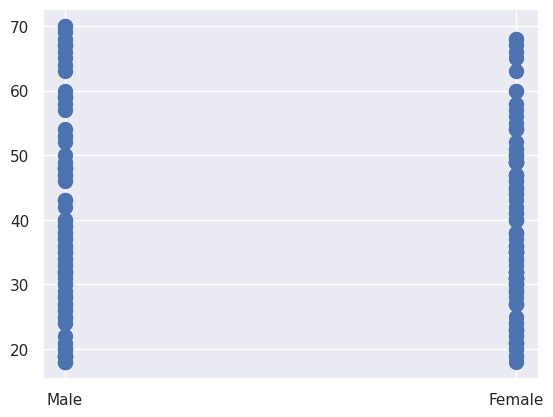

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)

X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)

y_kmeans = cl_kmeans.fit_predict(X_encoded)

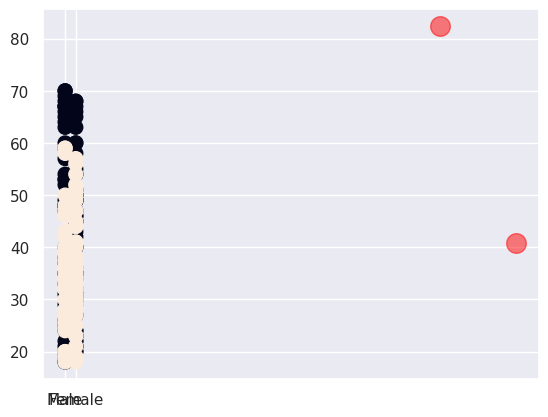

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 87170.74887218043


Nilai Inertia (SSE) untuk tiap k:
k=1: 176158.06000000008
k=2: 87170.74887218043
k=3: 59535.814647676154
k=4: 39551.60942422726
k=5: 31707.780070267767
k=6: 25447.381711066384
k=7: 21966.441318234603
k=8: 18975.458729542774
k=9: 16041.685436381926
k=10: 13969.723655134567


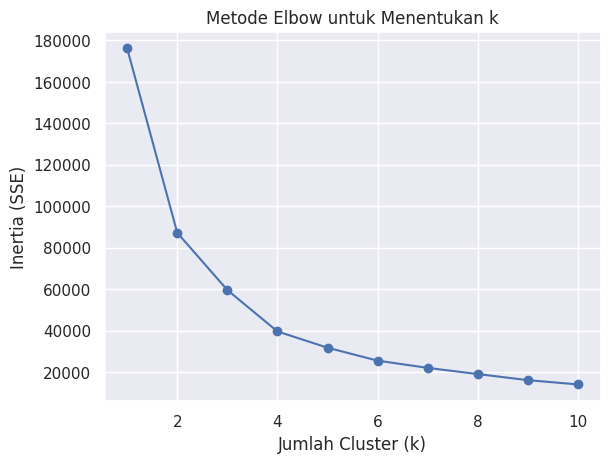

In [ ]:
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_encoded)
    inertia.append(kmeans.inertia_)

print("Nilai Inertia (SSE) untuk tiap k:")
for i, val in enumerate(inertia, 1):
    print(f"k={i}: {val}")

plt.plot(K, inertia, 'bo-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Metode Elbow untuk Menentukan k")
plt.show()

In [ ]:
for idx, sse_val in enumerate(inertia, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=176158.06000000008
k=2; SSE=87170.74887218043
k=3; SSE=59535.814647676154
k=4; SSE=39551.60942422726
k=5; SSE=31707.780070267767
k=6; SSE=25447.381711066384
k=7; SSE=21966.441318234603
k=8; SSE=18975.458729542774
k=9; SSE=16041.685436381926
k=10; SSE=13969.723655134567


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_encoded)

print("Label cluster untuk tiap data:")
print(y_kmeans[:20])

Label cluster untuk tiap data:
[2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

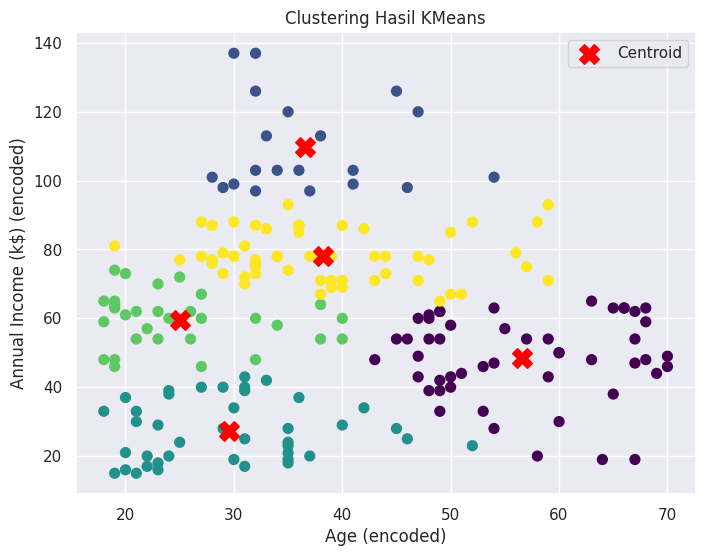

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_encoded.iloc[:,0], X_encoded.iloc[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroid')

plt.xlabel("Age (encoded)")
plt.ylabel("Annual Income (k$) (encoded)")
plt.title("Clustering Hasil KMeans")
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_encoded)
y_kmeans = kmeans.predict(X_encoded)

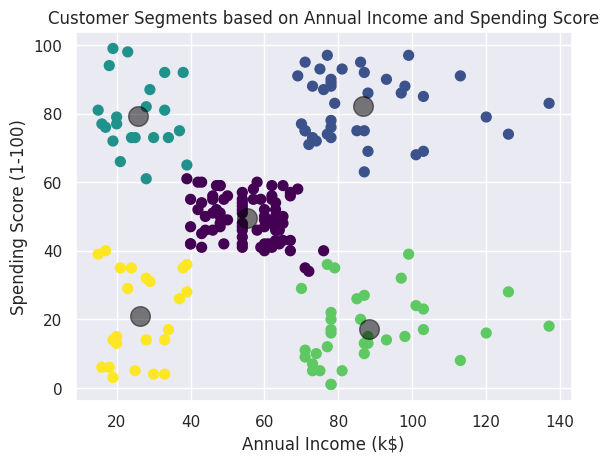

In [ ]:
X_income_spending = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans_income_spending = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans_income_spending = kmeans_income_spending.fit_predict(X_income_spending)


plt.scatter(X_income_spending['Annual Income (k$)'], X_income_spending['Spending Score (1-100)'], c=y_kmeans_income_spending, s=50, cmap='viridis')

centers = kmeans_income_spending.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.show()

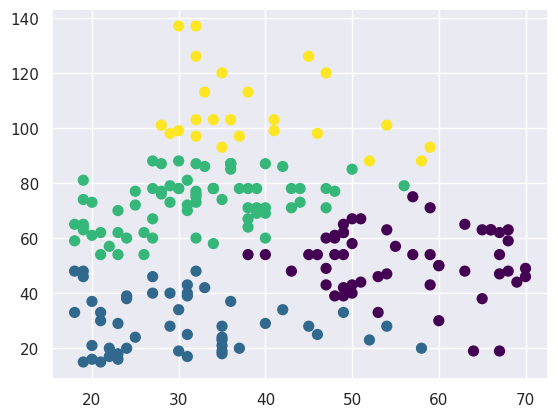

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X.iloc[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)

        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X_encoded, 4)
plt.scatter(X_encoded.iloc[:, 0], X_encoded.iloc[:, 1], c=labels,s=50, cmap='viridis');

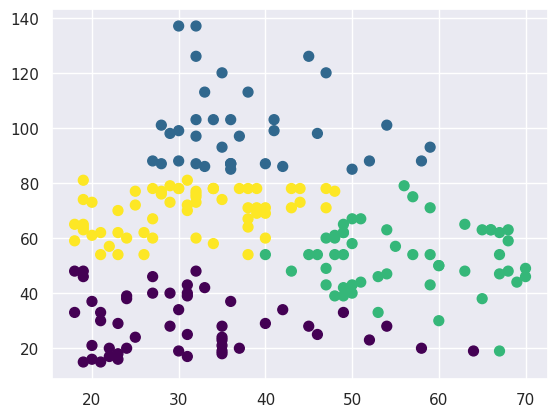

In [ ]:
centers, labels = find_clusters(X_encoded, 4, rseed=0)
plt.scatter(X_encoded.iloc[:, 0], X_encoded.iloc[:, 1], c=labels,s=50, cmap='viridis');

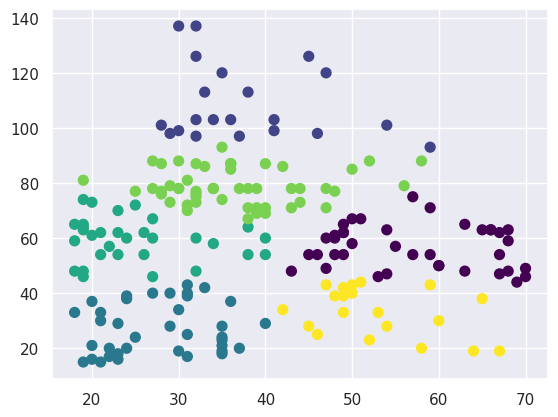

In [ ]:
labels = KMeans(6, random_state=0, n_init=10).fit_predict(X_encoded)
plt.scatter(X_encoded.iloc[:, 0], X_encoded.iloc[:, 1], c=labels, s=50, cmap='viridis');

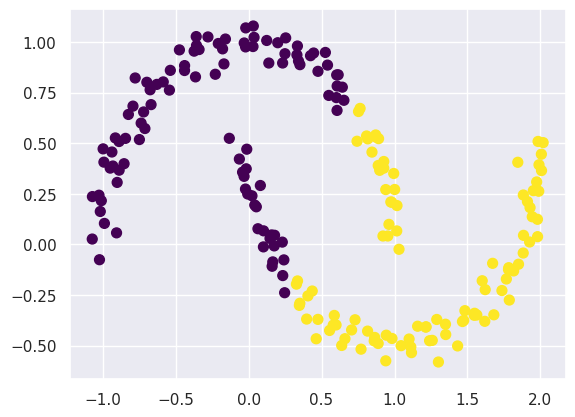

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

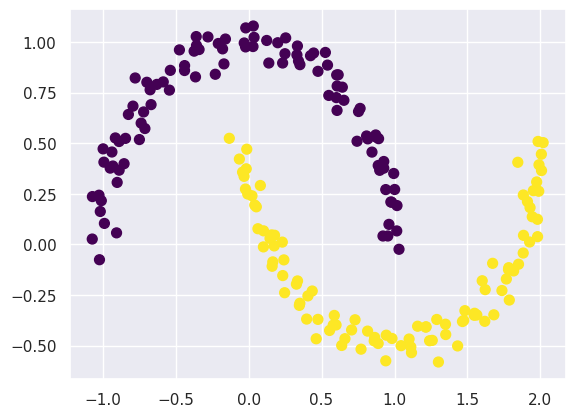

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');